<a href="https://colab.research.google.com/github/tastiz/projects.py/blob/master/WorkingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a data analyst, a new client that is involved in the insurance industry wishes to uncover correlations with their metrics to group patients into various insurance funds.  These funds need to have a balance in patients to best payout for claims and not bankrupt the company.  The insurance company wishes to identify if regions or smoking status also is effecting overall charges as well as considering bmi as factors associated with hospital visits and overall charge.  

The provided information on their patients will be used to build visulations that show the costs associated with smoking, bmi, and region.  With this dataset, trends in patients bmi and charges and how factors such as sex, smoking status and region effecting the overal cost for care.  I hypothesize that bmi will be correlated to increased charges.  

The client ultimately wants to understand their data more and decide how they wish to sepearte their insurance funds to best anticipate costs for premiums.    


In [0]:
#Intial setup for project
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'medicalcosts'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
insurance_df = pd.read_sql_table('medicalcosts', con=engine)

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

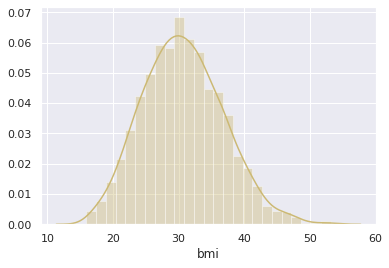

In [0]:
#histogram of bmi distribution appearing to be normal
bmi_ax = sns.distplot(insurance_df['bmi'], color="y")

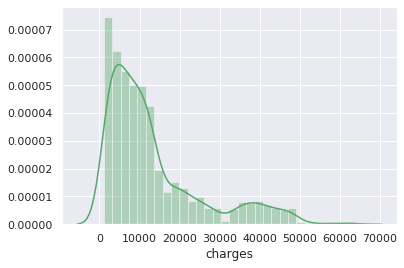

In [0]:
#histogram of charges
charges_ax = sns.distplot(insurance_df['charges'], color="g")

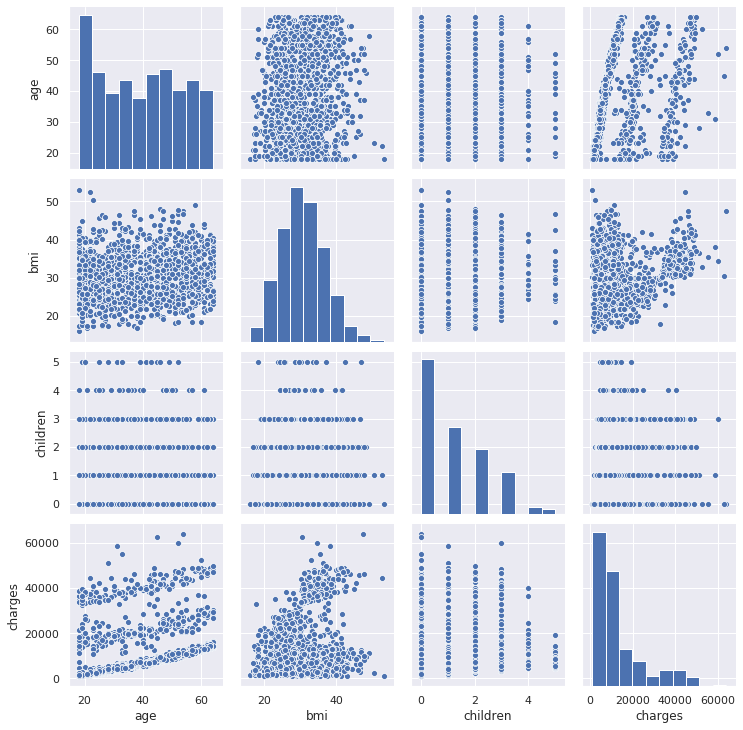

In [0]:
#rough analysis of possible correlations between vairables
sns.pairplot(insurance_df)

### From the pairplot function, it appears to be a pattern and weak correlation between age and charges creating tiered stratas.  Initially examining sex as a contributing variable to the stratas, smoking status is shown to be a driving force of charge increase and creation of the stratas.  This trend was seen in each region as well.  

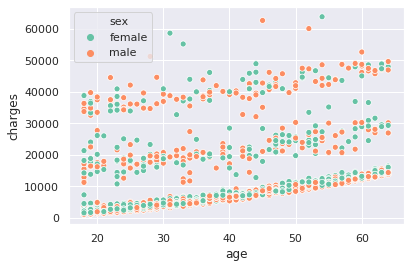

In [0]:
#investigating correlation of charges to age
sns.scatterplot(x="age", y="charges", hue="sex",palette="Set2", data=insurance_df)

## The scatterplot below shows an upward trend in charges as age increases in patients.  There are three stratifications that appear with persons who do not smoke having the lower overall charges than persons who do smoke.

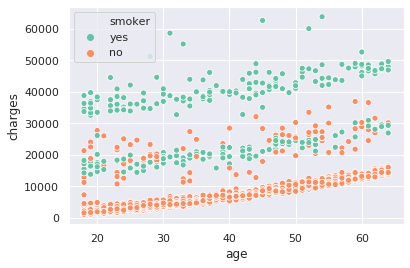

In [0]:
sns.scatterplot(x="age", y="charges", hue="smoker", palette="Set2", data=insurance_df)

## The boxplot below shows how each region has an increase in charges for smokers compared to non smokers.  

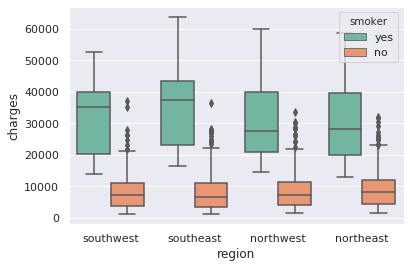

In [0]:
sns.boxplot(y="charges",x="region", hue="smoker", palette="Set2", data=insurance_df)

## To further examine the correlation, the data set was split into tables of smokers and non-smokers to evaluate if the charges were significantly different.

In [0]:
#Creates tables based on smoking status
smoker_yes = (insurance_df['smoker'] == "yes") 
smoker_yes_df = insurance_df.iloc[smoker_yes.values]
smoker_no = (insurance_df['smoker']== "no")
smoker_no_df = insurance_df.iloc[smoker_no.values]

## With a p-value of very close to zero, we can reject the null hypothesis with 95% certainty.  

In [0]:
#Tests for significant difference in charges for smokers vers non smokers
stats.ttest_ind(smoker_yes_df['charges'], smoker_no_df['charges'])

Ttest_indResult(statistic=46.66492154643642, pvalue=8.271380969131679e-283)

In [0]:
get_95_ci(smoker_no_df['charges'],smoker_yes_df['charges'])

'The difference in means at the 95% confidence interval (two-tail) is between 22202.693942567694 and 25029.235867404368.'

In [0]:
#splits the data set by region
southwest = (insurance_df['region'] == "southwest")
southwest_df = insurance_df.iloc[southwest.values]
southeast = (insurance_df['region'] == "southeast")
southeast_df = insurance_df.iloc[southeast.values]
northwest = (insurance_df['region'] == "northwest")
northwest_df = insurance_df.iloc[northwest.values]
northeast = (insurance_df['region'] == "northeast")
northeast_df = insurance_df.iloc[northeast.values]

## The only region that did not have a statistical difference in both bmi and charges was between the northern regions of the country.  All other comparisions showed statisical difference in bmi and inconsistently for charges.

In [0]:
#accepts the null hypothesis
stats.ttest_ind(southwest_df['charges'],southeast_df['charges'])

Ttest_indResult(statistic=-2.428176796786148, pvalue=0.015430674667805226)

In [0]:
#accepts the null hypothesis
stats.ttest_ind(northwest_df['charges'], northeast_df['charges'])

Ttest_indResult(statistic=-1.1281679372273878, pvalue=0.2596671673068375)

In [0]:
#accepts the null hypothesis
stats.ttest_ind(northwest_df['charges'], southwest_df['charges'])

Ttest_indResult(statistic=0.07956640964937679, pvalue=0.9366066766909533)

In [0]:
#accepts the null hypothesis
stats.ttest_ind(northeast_df['charges'], southeast_df['charges'])

Ttest_indResult(statistic=-1.363167104165983, pvalue=0.17327708539423628)

After exploring the data set, my hypothesis was incorrect and bmi is not shown to correlate with charges but smoking was shown to strongly contribute to increase in charges.  When considering the clients interest, it would be recommended diversify patients with smoking history into healthy patient funds due to the likeliehood that their insurance charges will be significantly higher than non-smoking patients.  

Regions did show to have a significant differences between each other when comapring charges spent.  Having insurance funds with patients of multiple regions can contribute to better diversity and overall protects the insurance company by being able to best anticipate insurance payouts.

The clients goal was for us to develop a strategy to best protect themesleves by having insurance funds that are diverse with healthy and at risk patients as to best pay out claims and avoid delay of payments.  The factors to consider that significantly effect charges are smoking status and region of patient while factors such as bmi, sex and number of children were not correlated to changes in overall charges.  
